# Project 1
## Kaiyue Wu

In [2]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import time
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.5, rc={'text.usetex' : True})

# 1. Random Number Generators

In [26]:
# Initialize LGM function
def LGM(x,n):
    '''
    x: initial value
    n: number of random variables to generate
    '''
    m=2**31-1
    a=7**5
    b=0

    LGM_rm=[]

    for i in range(n):
        x = (a*x+b) % m
        LGM_rm.append(x/m)
    return LGM_rm



LGM_rm= LGM(6,10000) # set x_0 = 6
LGM_rm_mean = np.mean(LGM_rm)
LGM_rm_std = np.std(LGM_rm)

print(f"LGM mean is {LGM_rm_mean}, LGM standard deviation is {LGM_rm_std}")

LGM mean is 0.5011609332500776, LGM standard deviation is 0.29044406111428883


Text(0.5, 1.0, 'LGM Random Variables')

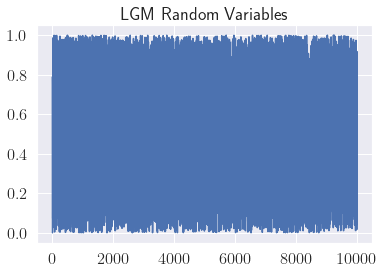

In [28]:
# check if the plot looks like uniform distribution

plt.plot(LGM_rm)
plt.title('LGM Random Variables')

In [4]:
# built-in function

built_in = np.random.uniform(0,1,10000)
built_in_mean = np.mean(built_in)
built_in_std = np.std(built_in)

print(f"Built-in function mean is {built_in_mean}, Built-in function deviation is {built_in_std}")

Built-in function mean is 0.4994848989791815, Built-in function deviation is 0.2894187013622021


# 2


In [16]:
prob_2 = []

for i in LGM_rm: #
    if i < 0.15:
        x = 2
    elif i < 0.15 + 0.20:
        x=1
    elif i< 0.15 +0.20 + 0.35:
        x=0
    else:
        x=-1
    prob_2.append(x)

Text(0.5, 1.0, 'Histogram')

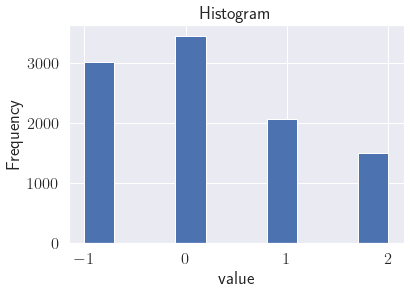

In [17]:
plt.hist(prob_2)
plt.ylabel('Frequency')
plt.xlabel('value')
plt.title('Histogram')

In [7]:
prob_2_mean = np.mean(prob_2)
prob_2_std = np.std(prob_2)
print(f"Empirical mean is {prob_2_mean}, Empirical standard deviation is {prob_2_std}")

Empirical mean is 0.2038, Empirical standard deviation is 1.0303715640486202


# 3. Using the LGM method generate Uniformly distributed random numbers on [0,1] to do the following:

Generate 1,000 random numbers with Binomial distribution with 𝑛 = 44 and 𝑝 = 0.64

In [18]:
# generate 44000 random variables first

prob3_LGM = LGM(8,44000)
bernoulli = []

for i in prob3_LGM:
    if i <=0.64:
        x=1
    else:
        x=0
    bernoulli.append(x)
#len(bernoulli) 44000

# n bernoulli get 1 binomial, 44 bernoulli get 1 binomial
bino =[]
i=0
while i <len(bernoulli):
    y = sum(bernoulli[i:i+44])
    bino.append(y)
    i+=44
#len(bino)

print(f'mean is {np.mean(bino)}, standard deviation is {np.std(bino)}')

mean is 28.201, standard deviation is 3.271788348900338


Text(0.5, 1.0, 'Histogram of  random numbers with Binomial distribution(44,0.64)')

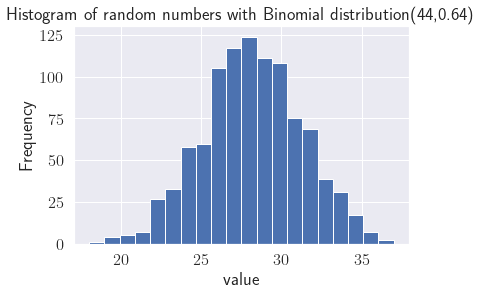

In [21]:
plt.hist(bino,bins=20)
plt.ylabel('Frequency')
plt.xlabel('value')
plt.title('Histogram of  random numbers with Binomial distribution(44,0.64)')

In [22]:
# p(x>=40)

p = sum([i for i in bino if i>=40])/len(bino)

print(f' The probability of x >= 40 is {p}')

 The probability of x >= 40 is 0.0


# 4

Generate 10,000 Exponentially distributed random numbers with parameter 𝜆 = 1.5.

In [11]:
# Generate 10,000 Exponentially distributed random numbers with parameter 𝜆 = 1.5.
lamb = 1.5
pro_4_LGM = LGM(6,10000) 
expo_rm = [-1/lamb*np.log(i) for i in pro_4_LGM]

# Compute 𝑃(𝑋 ≥ 1) and 𝑃(𝑋 ≥ 4).

p_greater_1 = sum([1 for i in expo_rm if i>=1])/len(expo_rm)
p_greater_4 = sum([1 for i in expo_rm if i>=4])/len(expo_rm)

print(f' The probability of x >= 1 is {p_greater_1}, The probability of x >= 4 is {p_greater_4}')

 The probability of x >= 1 is 0.2256, The probability of x >= 4 is 0.0032


In [12]:
# Compute the empirical mean and the standard deviation of the sequence of 10,000 numbers generated in part (a)

expo_rm_mean =np.mean(expo_rm)
expo_rm_std =np.std(expo_rm)
print(f"Empirical mean is {expo_rm_mean}, Empirical standard deviation is {expo_rm_std}")

Empirical mean is 0.6673470598512684, Empirical standard deviation is 0.6751481072709264


Text(0.5, 1.0, 'Histogram of random numbers with Exponential distribution')

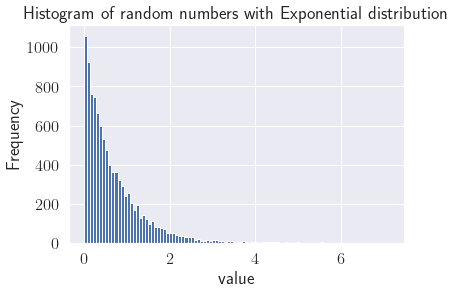

In [15]:
plt.hist(expo_rm,bins=100)
plt.ylabel('Frequency')
plt.xlabel('value')
plt.title('Histogram of random numbers with Exponential distribution')

# 5

## Box- Muller Method

In [23]:
# one pair of iid Uniform generate one pair of Normal
# 5000 normal requires 5000 uniform, 2500 pairs


p5_LGM =LGM(100,5000)

start_time = time.time()

norm_1 = []

i = 0
j=5000-1

while i<j:
    u1 = p5_LGM[i]
    u2 = p5_LGM[j]
    
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    
    norm_1.append(z1)
    norm_1.append(z2)
    
    i+=1
    j-=1

# len(norm_1)  5000, check numbers

excu_time_bm = time.time()-start_time
excu_time_bm

0.03823590278625488

## Polar-Marsaglia method

In [30]:
start_time = time.time()

norm_2 = []

i = 0
j=5000-1

while i<j:
    u1 = p5_LGM[i]
    u2 = p5_LGM[j]
    
    v1 = 2*u1-1
    v2 = 2*u2-1
    w = v1**2 + v2**2
    
    if w<=1:
        z1 = v1*np.sqrt((-2*np.log(w))/w)
        z2 = v2*np.sqrt((-2*np.log(w))/w)
    
    norm_2.append(z1)
    norm_2.append(z2)
    
    i+=1
    j-=1
    
excu_time_pm = time.time()-start_time
excu_time_pm

0.03139185905456543

In [31]:
new_line = '\n'

print(f'The mean for Box- Muller Method normal distributed r.v is {np.mean(norm_1)}{new_line}\
The mean for Polar-MarsagliaMethod normal distributed r.v is {np.mean(norm_2)}{new_line}\
{new_line}\
The standard deviation for Box- Muller Method normal distributed r.v is {np.std(norm_1)}{new_line}\
The standard deviation for Polar-Marsaglia Method normal distributed r.v is {np.std(norm_2)}\
{new_line}')

print(f'The execution time for Box- Muller Method is {excu_time_bm} {new_line}\
The execution time for Polar-Marsaglia method is {excu_time_pm}')

The mean for Box- Muller Method normal distributed r.v is -0.020994735561742948
The mean for Polar-MarsagliaMethod normal distributed r.v is -0.03441971190072053

The standard deviation for Box- Muller Method normal distributed r.v is 1.0104714556847032
The standard deviation for Polar-Marsaglia Method normal distributed r.v is 0.9988391532719084

The execution time for Box- Muller Method is 0.03823590278625488 
The execution time for Polar-Marsaglia method is 0.03139185905456543
